In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the universe of discourse for each variable
temperature = ctrl.Antecedent(np.arange(34, 43, 0.1), 'temperature')
headache = ctrl.Antecedent(np.arange(0, 11, 0.1), 'headache')
age = ctrl.Antecedent(np.arange(0, 131, 0.1), 'age')
urgency = ctrl.Consequent(np.arange(0, 101, 0.1), 'urgency')

# Define membership functions for each variable
# Membership functions for Temperature
temperature['low'] = fuzz.trapmf(temperature.universe, [34, 34, 35, 36])
temperature['normal'] = fuzz.gaussmf(temperature.universe, 37, 0.5)
temperature['high'] = fuzz.trapmf(temperature.universe, [38, 39, 42, 42])

# Membership functions for Headache
headache['mild'] = fuzz.gaussmf(headache.universe, 2.5, 1)
headache['moderate'] = fuzz.gaussmf(headache.universe, 5, 1)
headache['severe'] = fuzz.gaussmf(headache.universe, 7.5, 1)

# Membership functions for Age
age['baby'] = fuzz.trapmf(age.universe, [0, 0, 5, 10])
age['child'] = fuzz.trapmf(age.universe, [8, 11, 17, 19])
age['adult'] = fuzz.gaussmf(age.universe, 40, 10)
age['elderly'] = fuzz.trapmf(age.universe, [60, 65, 130, 130])

# Membership functions for Urgency
urgency['low'] = fuzz.gaussmf(urgency.universe, 20, 10)
urgency['moderate'] = fuzz.gaussmf(urgency.universe, 50, 10)
urgency['high'] = fuzz.gaussmf(urgency.universe, 80, 10)


# Define rules
# Define the rules
rule1 = ctrl.Rule(temperature['high'] & headache['severe'], urgency['high'])
rule2 = ctrl.Rule(temperature['high'] & headache['mild'] & age['elderly'], urgency['moderate'])
rule3 = ctrl.Rule(temperature['low'] & age['child'], urgency['moderate'])
rule4 = ctrl.Rule(headache['moderate'] & age['adult'], urgency['low'])
rule5 = ctrl.Rule(headache['severe'] & age['child'], urgency['moderate'])
rule6 = ctrl.Rule(temperature['normal'] & headache['mild'] & age['adult'], urgency['low'])
rule7 = ctrl.Rule(age['elderly'] & headache['moderate'], urgency['moderate'])
rule8 = ctrl.Rule(temperature['high'] & age['child'], urgency['high'])
rule9 = ctrl.Rule(temperature['low'] & headache['severe'] & age['adult'], urgency['high'])
rule10 = ctrl.Rule(temperature['normal'] & headache['moderate'] & age['elderly'], urgency['moderate'])

# Create and simulate a fuzzy control system
urgency_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
urgency_simulation = ctrl.ControlSystemSimulation(urgency_control)

# Example of input values and computation
urgency_simulation.input['temperature'] = 41
urgency_simulation.input['headache'] = 10
urgency_simulation.input['age'] = 1
urgency_simulation.compute()
print(urgency_simulation.output['urgency'])


76.07125070270257


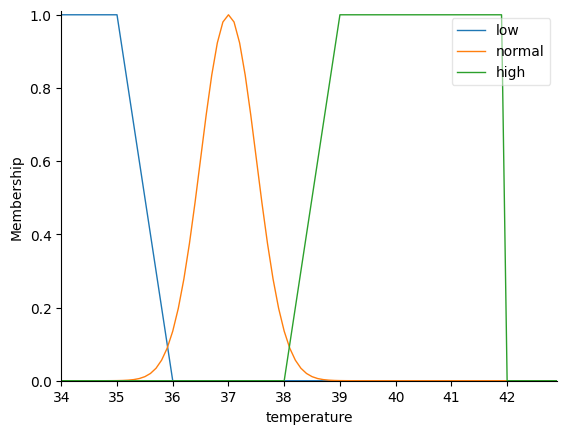

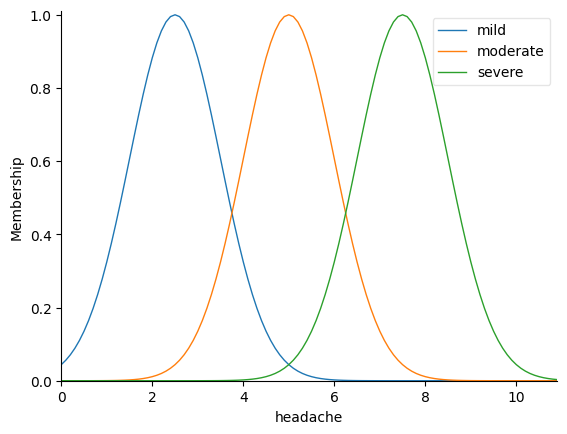

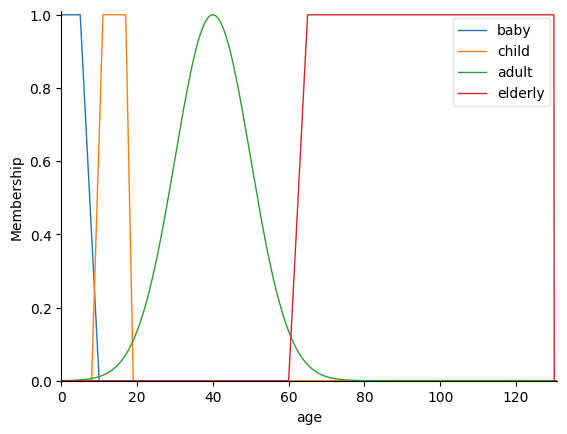

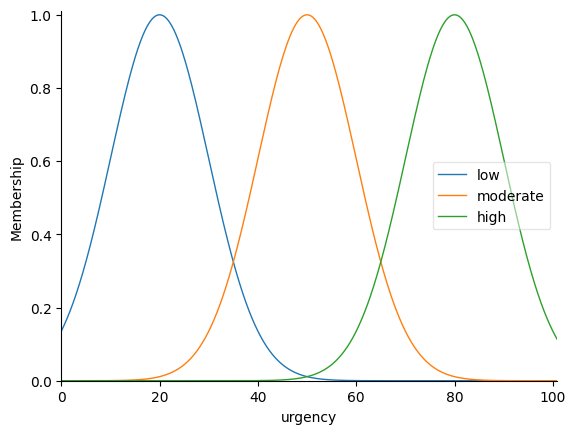

In [26]:
import matplotlib.pyplot as plt

# Visualize the Membership Functions
temperature.view()
headache.view()
age.view()
urgency.view()

plt.show()


/Users/rostislavshepel/Documents/Documents - Ростислав’s MacBook Pro/Programming/Python/COMP4033 Fuzzy Logic and Fuzzy Systems/.conda/lib/python3.10/site-packages/skfuzzy/control/controlsystem.py:133: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


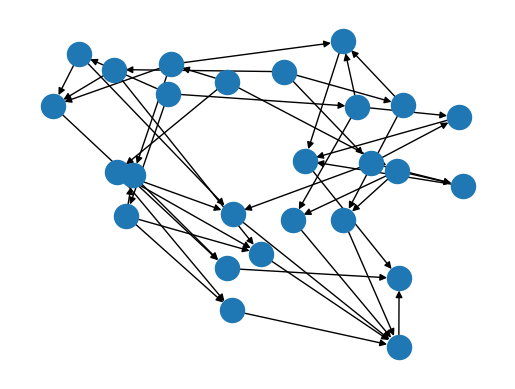

In [19]:
# Visualize the Control System
urgency_control.view()

plt.show()
